Partie 1
#Chargement des données 

In [20]:
import pandas as pd
import re

def extract_data(input_path, pattern):
    with open(input_path, 'r') as file:
        content = file.read()
    matches = re.findall(pattern, content, re.MULTILINE)
    data = []
    for match in matches:
        numbers = match[1].replace('\n', ' ').split()
        numbers_float = [float(number) for number in numbers]
        data.append(numbers_float)
    return pd.DataFrame(data)

rocks_path = 'data/sonar.rocks'
mines_path = 'data/sonar.mines'

# Patterns for extracting train and test data
train_pattern = r'\*(CR|CM)\d+:\n\{([\d\s\.\n]+)\}'
test_pattern = r'^(?!\*)(CR|CM)\d+:\n\{([\d\s\.\n]+)\}'

# Extracting train and test data
rocks_train_df = extract_data(rocks_path, train_pattern)
mines_train_df = extract_data(mines_path, train_pattern)
rocks_train_df['Label'] = 'R'  
mines_train_df['Label'] = 'M' 
train_df = pd.concat([rocks_train_df, mines_train_df], ignore_index=True).sample(frac=1).reset_index(drop=True)

rocks_test_df = extract_data(rocks_path, test_pattern)
mines_test_df = extract_data(mines_path, test_pattern)
rocks_test_df['Label'] = 'R'  
mines_test_df['Label'] = 'M' 
test_df = pd.concat([rocks_test_df, mines_test_df], ignore_index=True).sample(frac=1).reset_index(drop=True)

print(len(train_df))
print(len(test_df)) 


104
104


Partie 2

##Apprentissage sur train

In [21]:
import numpy as np

def perceptron_batch(training_features, training_labels, epochs=22000, learning_rate=0.001):

    # Initialisation des poids
    weights = np.zeros(training_features.shape[1] + 1)
    
    # Entraînement
    for _ in range(epochs):
        # Initialisation du vecteur de mise à jour pour cette époque
        update = np.zeros(training_features.shape[1] + 1)
        
        for inputs, label in zip(training_features, training_labels):
            # Calcul de la prédiction
            activation = np.dot(inputs, weights[1:]) + weights[0]
            if activation >= 0:
                prediction = 1
            else:
                prediction = -1
            
            # Accumulation de la mise à jour basée sur l'erreur
            update[1:] += learning_rate * (label - prediction) * inputs
            update[0] += learning_rate * (label - prediction)
        
        # Mise à jour des poids à la fin de l'époque
        weights += update
    
    return weights

# Préparation des données
# Supposons que train_df est déjà défini et mélangé
# Convertir les étiquettes 'R' et 'M' en valeurs numériques -1 et 1
train_df['Label'] = train_df['Label'].apply(lambda x: 1 if x == 'M' else -1)
test_df['Label'] = test_df['Label'].apply(lambda x: 1 if x == 'M' else -1)

# Séparation des caractéristiques et des étiquettes
features = train_df.iloc[:, :-1].values
labels = train_df.iloc[:, -1].values

# Entraînement du perceptron
weights = perceptron_batch(features, labels)

Calcul de Ea et de Eg

In [23]:
def predict_perceptron(inputs, weights):
    activation = np.dot(inputs, weights[1:]) + weights[0]
    return 1 if activation >= 0 else -1

# Fonction pour calculer la précision
def calculate_accuracy(features, labels, weights):
    predictions = [predict_perceptron(x, weights) for x in features]
    correct_predictions = sum(pred == label for pred, label in zip(predictions, labels))
    accuracy = correct_predictions / len(labels)
    return accuracy

# Convertir les étiquettes de l'ensemble de test en valeurs numériques -1 et 1
# test_df['Label'] = test_df['Label'].apply(lambda x: 1 if x == 'M' else -1)

# Séparer les caractéristiques et les étiquettes de l'ensemble de test
test_features = test_df.iloc[:, :-1].values
test_labels = test_df.iloc[:, -1].values

print (test_labels)
predictions = [predict_perceptron(x, weights) for x in test_features]
print (predictions)
# Calculer la précision sur l'ensemble d'entraînement et de test
training_accuracy = calculate_accuracy(features, labels, weights)
testing_accuracy = calculate_accuracy(test_features, test_labels, weights)

# Calculer les erreurs d'apprentissage (Ea) et de généralisation (Eg)
Ea = 1 - training_accuracy
Eg = 1 - testing_accuracy

print(f"Erreur d'apprentissage (Ea) : {Ea}")
print(f"Erreur de généralisation (Eg) : {Eg}")

print("Les poids du perceptron",weights)

[ 1  1 -1 -1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1 -1  1 -1
  1 -1 -1  1  1  1  1  1  1  1 -1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1 -1 -1  1  1 -1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1
  1  1  1  1 -1 -1  1 -1  1 -1  1  1 -1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1 -1 -1  1  1  1  1]
[1, -1, -1, -1, -1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1]
Erreur d'apprentissage (Ea) : 0.0
Erreur de généralisation (Eg) : 0.1923076923076923


Fonction de stabilité

In [24]:
def calculate_stability(features, labels, weights):
    norm_w = np.linalg.norm(weights[1:])  # Calcul de la norme du vecteur de poids (sans le biais)
    stabilities = []
    for x, y in zip(features, labels):
        # Calcul de la marge fonctionnelle pour chaque exemple
        gamma = y * (np.dot(weights[1:], x) + weights[0]) / norm_w
        stabilities.append(gamma)
    return stabilities

# Calcul des stabilités pour l'ensemble de test
test_stabilities = calculate_stability(test_features, test_labels, weights)

# Afficher les stabilités des exemples de test
print(test_stabilities)


[0.06810040308188955, -0.03217561629122765, 0.014626107736106043, 0.045805859551034715, -0.008394134711908634, 0.0665445430277821, 0.04688918152086863, 0.08248702066139742, 0.07983593435331966, 0.09047079036006, -0.10987461833132714, -0.04335662826628122, 0.05905422131395836, 0.048960652543282815, 0.039792229771214105, 0.10841419895433946, -0.10534737547048376, 0.040221817682871995, 0.00804233519140113, 0.030945614124021484, -0.009165359455128938, 0.09589829040586853, 0.06489550841872516, 0.024904576484390675, 0.2026138800717119, 0.03666161187972553, 0.007441359997922064, 0.16721869785066729, 0.16423151163533015, 0.006841335479741866, -0.06331791162327705, 0.05878370610761803, 0.06265733368466629, 0.09616320527106954, -0.07474226052332665, 0.021359085205929124, -0.0046139592277238805, 0.07343003608747563, -0.014154321773557408, 0.013523552468381793, 0.060290812041228124, 0.030317984360203196, -0.01623132799917312, -0.0021689656867136305, 0.040670176161940644, 0.11231781199792862, 0.128

Graph

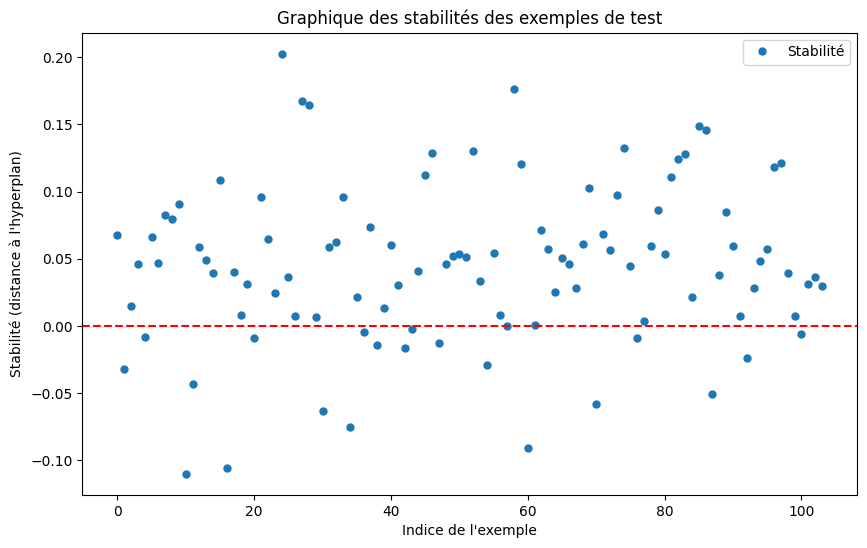

In [25]:
import matplotlib.pyplot as plt

# Calcul des stabilités pour l'ensemble de test (réutilisation du code précédent)
test_stabilities = calculate_stability(test_features, test_labels, weights)

# Création du graphique des stabilités
plt.figure(figsize=(10, 6))
plt.plot(test_stabilities, marker='o', linestyle='None', markersize=5, label='Stabilité')
plt.axhline(0, color='red', linestyle='--')  # Ligne pour la marge de stabilité à 0
plt.title("Graphique des stabilités des exemples de test")
plt.xlabel("Indice de l'exemple")
plt.ylabel("Stabilité (distance à l'hyperplan)")
plt.legend()
plt.show()